In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('./data/test.csv')

In [9]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/tanveer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


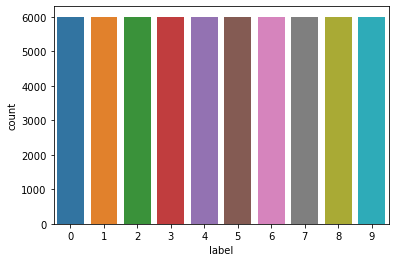

In [20]:
sns.countplot(data['label'])
plt.show()

In [4]:
data['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [5]:
data.shape

(60000, 785)

In [21]:
data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [44]:
X_all = (data.iloc[:,1:].values).astype('float32')
y_all = data.iloc[:,0].values.astype('int32')

# Visualization  

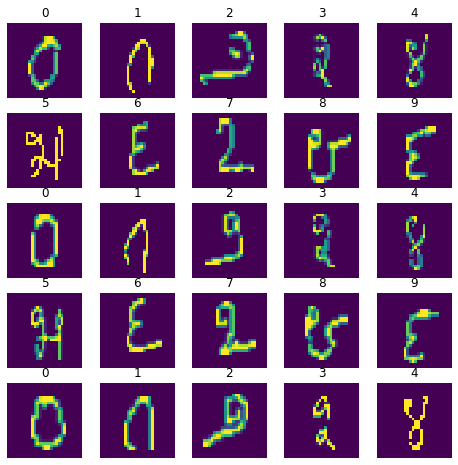

In [45]:
# https://www.kaggle.com/subinium/t-sne-viz-on-kannada-mnist

plt.figure(figsize=(8,8))

x, y = 5, 5
for i in range(25):  
    plt.subplot(y, x, i+1)
    plt.title(str(y_all[i]))
    plt.axis('off')
    plt.imshow(X_all[i].reshape((28,28)),interpolation='nearest')
plt.show()


In [49]:
knn = KNeighborsClassifier()

In [4]:
X= data.drop(columns= 'label')
y= data['label']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)



# Defeault KNN MODEL 

In [5]:
# BASELINE KNN MODEL 

ss= StandardScaler()

Z_train = ss.fit_transform(X_train)

Z_test = ss.transform(X_test)

knn =KNeighborsClassifier(n_jobs=-1)






In [58]:
knn.fit(Z_train,y_train)
knn.score(Z_train,y_train),knn.score(Z_test,y_test)


(0.9773555555555555, 0.9674666666666667)

##  knn_parameters grid search 

In [ ]:
from scipy.stats import uniform, randint

In [64]:
knn_parameters = {'n_neighbors':[3,5,7],
                  'weights': ['uniform','distance'],
                 'p': [1,2]
                 }

# Instantiate our GridSearchCV object.
knn_gs1 = GridSearchCV(knn,param_grid= knn_parameters,cv=3,verbose=2,n_jobs=-1)
# 
knn_gs1.fit(Z_train,y_train)
#
knn_gs1.score(Z_train,y_train),knn_gs1.score(Z_test,y_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


(1.0, 0.9786)

In [65]:
pd.DataFrame(knn_gs1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.169033,0.034479,255.522256,1.198569,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.975133,0.974467,0.973000,0.974200,0.000891,3
1,0.126379,0.006628,257.658674,1.511077,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.975600,0.976067,0.974000,0.975222,0.000885,1
2,0.125589,0.006016,19.393170,0.231328,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.961200,0.964467,0.961867,0.962511,0.001409,10
3,0.121519,0.006678,19.781373,0.412615,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.963333,0.965933,0.963067,0.964111,0.001293,7
4,0.144598,0.021522,238.838154,2.397297,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.974133,0.974467,0.973133,0.973911,0.000567,5
5,0.128543,0.024555,228.367064,7.082681,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.974867,0.976200,0.974000,0.975022,0.000905,2
6,0.182975,0.056800,24.285458,0.724642,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.961200,0.963533,0.961867,0.962200,0.000981,11
7,0.201821,0.068967,24.326541,0.702678,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.963000,0.965267,0.962800,0.963689,0.001119,8
8,0.165356,0.071650,235.382353,7.249849,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",0.973133,0.973267,0.972400,0.972933,0.000381,6
9,0.138136,0.035747,222.681901,0.784268,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.974000,0.975267,0.973067,0.974111,0.000902,4


{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

## KNeighborsClassifier(n_jobs=-1,n_neighbors=3, p=1,weights='uniform')

In [67]:
# define update knn 
knn2= KNeighborsClassifier(n_jobs=-1,n_neighbors=3, p=1,weights='uniform')
knn2.fit(Z_train,y_train)
knn2.score(Z_train,y_train),knn2.score(Z_test,y_test)


 ### pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [ ]:
knn_parameters = {'n_neighbors':[3,5,7],
                  'weights': ['uniform','distance'],
                 'p': [1,2]
                 }

# Instantiate our GridSearchCV object.
knn_gs1 = GridSearchCV(knn,param_grid= knn_parameters,cv=3,verbose=2,n_jobs=-1)
# 
knn_gs1.fit(Z_train,y_train)
#
knn_gs1.score(Z_train,y_train),knn_gs1.score(Z_test,y_test)


see if algorithm makes a difference 

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.



In [70]:
knn2

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1)

In [ ]:
# took longer then 2 min maybe come back to this 
knn3= KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1,algorithm='ball_tree')
knn3.fit(Z_train,y_train)
knn3.score(Z_train,y_train),knn3.score(Z_test,y_test)

In [69]:
import random 

In [ ]:
knn_parameters2 = { 'algorithm': ['ball_tree','auto']
                   
                 }

# Instantiate our GridSearchCV object.
knn_gs2 = GridSearchCV(knn2,param_grid= knn_parameters2,cv=3,verbose=2,n_jobs=-1)
# 
knn_gs2.fit(Z_train,y_train)
#
knn_gs2.score(Z_train,y_train),knn_gs1.score(Z_test,y_test)

# Gradient Boosting Models

In [74]:
from sklearn.ensemble import GradientBoostingClassifier, \
                            AdaBoostClassifier, \
                            VotingClassifier, \
                            RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [76]:
# Default hyperparameters 

gbc= GradientBoostingClassifier(random_state=42,verbose=2)

gbc.fit(Z_train,y_train)

gbc.score(Z_train,y_train),gbc.score(Z_test,y_test)

      Iter       Train Loss   Remaining Time 
         1           1.8253           16.25m
         2           1.5711           16.06m
         3           1.3956           15.86m
         4           1.2490           15.69m
         5           1.1300           15.52m
         6           1.0359           15.34m
         7           0.9508           15.18m
         8           0.8819           15.02m
         9           0.8159           14.85m
        10           0.7597           14.68m
        11           0.7089           14.53m
        12           0.6660           14.37m
        13           0.6259           14.26m
        14           0.5917           14.15m
        15           0.5580           13.98m
        16           0.5289           13.83m
        17           0.4995           13.68m
        18           0.4742           13.52m
        19           0.4524           13.35m
        20           0.4300           13.18m
        21           0.4118           13.01m
        2

(0.9816666666666667, 0.969)

## max_depth =5 

In [87]:
gbc1= GradientBoostingClassifier(random_state=42,verbose=2, max_depth=5)

gbc1.fit(Z_train,y_train)

gbc1.score(Z_train,y_train),gbc1.score(Z_test,y_test)

      Iter       Train Loss   Remaining Time 
         1           1.6956           28.43m
         2           1.4040           28.02m
         3           1.2002           27.74m
         4           1.0421           27.35m
         5           0.9188           27.07m
         6           0.8142           26.84m
         7           0.7272           26.59m
         8           0.6523           26.24m
         9           0.5894           25.95m
        10           0.5338           25.67m
        11           0.4859           25.38m
        12           0.4438           25.09m
        13           0.4057           24.80m
        14           0.3735           24.50m
        15           0.3451           24.20m
        16           0.3200           23.91m
        17           0.2966           23.62m
        18           0.2756           23.35m
        19           0.2571           23.07m
        20           0.2406           22.77m
        21           0.2251           22.47m
        2

(0.9992666666666666, 0.9790666666666666)

In [ ]:
# 

gbc1= GradientBoostingClassifier(random_state=42,verbose=2,loss='exponential')

knn_parameters = {'n_neighbors':[3,5,7],
                  'weights': ['uniform','distance'],
                 'p': [1,2]
                 }

# Instantiate our GridSearchCV object.
knn_gs1 = GridSearchCV(knn,param_grid= knn_parameters,cv=3,verbose=2,n_jobs=-1)
# 
knn_gs1.fit(Z_train,y_train)
#
knn_gs1.score(Z_train,y_train),knn_gs1.score(Z_test,y_test)


# XGBoost

## Default Hyperparamters

In [10]:
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
xgb = XGBClassifier(verbosity=1,n_jobs=-1,random_state=42)

xgb.fit(Z_train,y_train)

xgb.score(Z_train,y_train),xgb.score(Z_test,y_test)

[18:24:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## try Boosters 

booster [default= gbtree ]

Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

In [83]:
xgb1 = XGBClassifier(verbosity=1,n_jobs=-1,random_state=42)

xgb1_parameters = {'booster':['gbtree', 'gblinear','dart'],
                 }

# Instantiate our GridSearchCV object.
xgb_gs1 = GridSearchCV(xgb,param_grid= xgb1_parameters,cv=3,verbose=2,n_jobs=-1)
# 
xgb_gs1.fit(Z_train,y_train)
#
xgb_gs1.score(Z_train,y_train),xgb_gs1.score(Z_test,y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


(0.9678156680122355, 0.9347266075295216)

In [86]:
pd.DataFrame(xgb_gs1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,56.106416,1.658262,0.086644,0.003081,gbtree,{'booster': 'gbtree'},0.933438,0.931077,0.929068,0.931194,0.001786,2
1,7.892709,0.349983,0.168861,0.005440,gblinear,{'booster': 'gblinear'},-25898.684943,-19200.012619,-22037.473770,-22378.723777,2745.346536,3
2,208.669241,49.519535,4.724973,1.602791,dart,{'booster': 'dart'},0.933438,0.931077,0.929068,0.931194,0.001786,1


# more tuning 

In [ ]:
xgb2 = XGBClassifier(verbosity=1,n_jobs=-1,random_state=42)

xgb2_parameters = {'eta':uniform(0.1,0.3),
                   'min_child_weight': uniform(1,10),
                   'max_depth': radint(3,10)                   
                 }

# Instantiate our GridSearchCV object.
xgb_rs1 = RandomizedSearchCV(xgb2,param_distributions= xgb2_parameters,cv=3,random_state=42,n_iter=10,n_jobs=-1,verbose=2)
# 
xgb_rs1.fit(Z_train,y_train)
#
xgb_rs1.score(Z_train,y_train),xgb_rs1.score(Z_test,y_test)